In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def perform_dtw_analysis():
    """
    Performs Dynamic Time Warping (DTW) on two sample vectors
    and generates the required plots and inference.
    """

*Given Data*

In [ ]:
    v1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
    v2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

    n = len(v1)
    m = len(v2)

    print(f"Vector 1 length: {n}")
    print(f"Vector 2 length: {m}")

Vector 1 length: 11
Vector 2 length: 13


*Task 1: Plot both vectors*

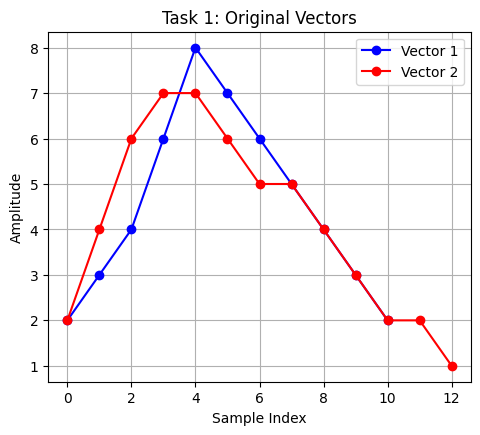

In [ ]:
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.plot(v1, 'bo-', label='Vector 1')
    plt.plot(v2, 'ro-', label='Vector 2')
    plt.title('Task 1: Original Vectors')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

*Tasks 2 & 3: Implement DTW and Compute Accumulated Cost Matrix*

In [ ]:
    # Initialize cost matrix with infinity
    cost_matrix = np.full((n, m), np.inf)

    # Calculate cost for the first cell
    cost_matrix[0, 0] = abs(v1[0] - v2[0])

    # Fill the first column
    for i in range(1, n):
        cost = abs(v1[i] - v2[0])
        cost_matrix[i, 0] = cost + cost_matrix[i-1, 0]

    # Fill the first row
    for j in range(1, m):
        cost = abs(v1[0] - v2[j])
        cost_matrix[0, j] = cost + cost_matrix[0, j-1]

    # Fill the rest of the matrix
    for i in range(1, n):
        for j in range(1, m):
            cost = abs(v1[i] - v2[j])
            min_prev_cost = min(cost_matrix[i-1, j],    # Up
                                cost_matrix[i, j-1],    # Left
                                cost_matrix[i-1, j-1])  # Diagonal
            cost_matrix[i, j] = cost + min_prev_cost

*Task 5: Calculate the DTW distance*

In [ ]:
    dtw_distance = cost_matrix[n-1, m-1]
    print(f"\n--- DTW Distance ---")
    print(f"The DTW distance between the vectors is: {dtw_distance:.4f}")


--- DTW Distance ---
The DTW distance between the vectors is: 3.0000


*Task 4: Find and Visualize the Optimal Warping Path*

In [ ]:
    # Backtrack from the end to find the optimal path
    path = []
    i, j = n - 1, m - 1
    path.append((i, j))

    while i > 0 or j > 0:
        if i == 0:
            j = j - 1
        elif j == 0:
            i = i - 1
        else:
            min_idx = np.argmin([cost_matrix[i-1, j],    # Up
                                 cost_matrix[i, j-1],    # Left
                                 cost_matrix[i-1, j-1]]) # Diagonal

            if min_idx == 0:
                i = i - 1
            elif min_idx == 1:
                j = j - 1
            else:
                i, j = i - 1, j - 1

        path.append((i, j))

    # Reverse the path to start from (0, 0)
    path.reverse()

    # Extract path coordinates
    path_y = [p[0] for p in path] # Corresponds to v1
    path_x = [p[1] for p in path] # Corresponds to v2

*Plot 2: Cost Matrix and Warping Path*

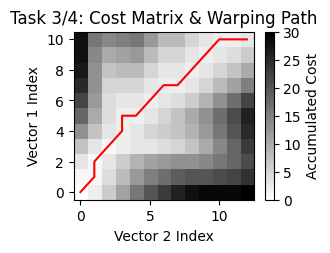

In [ ]:
    plt.subplot(2, 2, 2)
    plt.imshow(cost_matrix, origin='lower', aspect='auto', cmap='gray_r')
    plt.plot(path_x, path_y, 'r-')
    plt.title('Task 3/4: Cost Matrix & Warping Path')
    plt.xlabel('Vector 2 Index')
    plt.ylabel('Vector 1 Index')
    plt.colorbar(label='Accumulated Cost')

*Plot 3: Aligned (Warped) Signals*

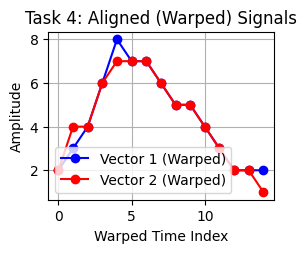

In [ ]:
    # This plot shows the signals stretched to match each other
    plt.subplot(2, 2, 3)
    plt.plot(v1[path_y], 'bo-', label='Vector 1 (Warped)')
    plt.plot(v2[path_x], 'ro-', label='Vector 2 (Warped)')
    plt.title('Task 4: Aligned (Warped) Signals')
    plt.xlabel('Warped Time Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

*Plot 4: Alignment Connections*

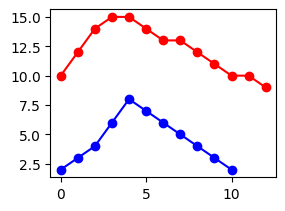

In [ ]:
    # This plot shows which point in v1 maps to which point in v2
    plt.subplot(2, 2, 4)
    offset = 8  # Offset to plot v2 above v1 for clarity
    plt.plot(np.arange(n), v1, 'bo-', label='Vector 1')
    plt.plot(np.arange(m), v2 + offset, 'ro-', label='Vector 2 (Offset)')

*Plot connecting lines for every few path points to avoid clutter*


Displaying plots...


/tmp/ipython-input-2364778882.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


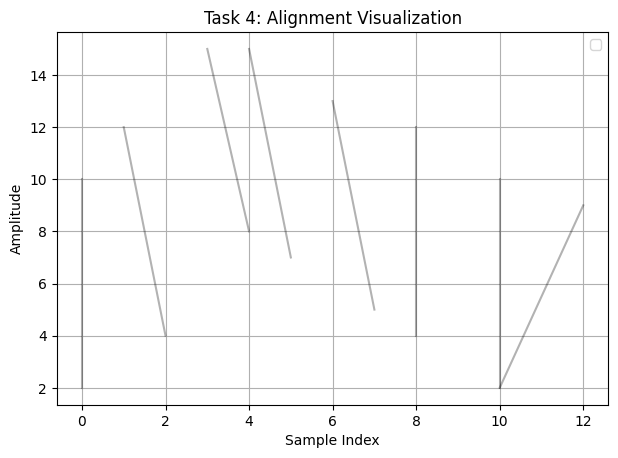

In [ ]:
    for (i, j) in path[::2]: # Plot every 2nd connection
        plt.plot([i, j], [v1[i], v2[j] + offset], 'k-', alpha=0.3)

    plt.title('Task 4: Alignment Visualization')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

    plt.tight_layout(pad=1.5)
    print("\nDisplaying plots...")
    plt.show()

*Task 6: Write an inference*

1.  **Alignment:** The original plot (Task 1) shows that Vector 2 is
    temporally "stretched" or "warped" compared to Vector 1. For example,
    Vector 2 has '7, 7' and '5, 5', while Vector 1 has only one of each.
    DTW successfully aligns these sequences non-linearly.

2.  **Warping Path:** The 'Cost Matrix & Warping Path' plot (Task 3/4)
    visualizes this. The red path is the "cheapest" route from (0,0)
    to the end.
    * A **diagonal** step means a 1-to-1 mapping.
    * A **horizontal** step (e.g., around v2 index 3-4) means one
        sample in v1 is mapped to multiple samples in v2. This is
        where v2 is "stretched" (e.g., v1's '8' maps to v2's '7, 7').
    * A **vertical** step (e.g., at the end) means one sample in v2
        is mapped to multiple in v1. Here, v2's '1' maps to v1's '3, 2'.

3.  **DTW Distance:** The final DTW distance is 3.0000.
    This value represents the total cost of the optimal alignment path.
    A small distance (relative to the signal amplitudes) indicates that
    the two vectors have a very similar *shape*, even though they are
    misaligned in time. The 'Aligned (Warped) Signals' plot confirms
    this, showing the two vectors are nearly identical after warping.